In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
docs = ['additional income',
		'best price',
		'big bucks',
		'cash bonus',
		'earn extra cash',
		'spring savings certificate',
		'valero gas marketing',
		'all domestic employees',
		'nominations for oct',
		'confirmation from spinner']

labels = np.array([1,1,1,1,1,0,0,0,0,0])

- one_hot() 함수는 해싱을 이용하여 정수를 생성한다.
- 해시 함수의 충돌 확률을 줄이기 위하여 필요한 것 보다 큰 어휘 크기 50 사용한다.

In [3]:
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)

[[44, 4], [44, 41], [28, 24], [32, 36], [9, 14, 32], [23, 35, 1], [19, 47, 37], [3, 40, 43], [46, 26, 21], [8, 28, 10]]


- pad_sequences()함수로 입력 시퀀스의 길이, 즉 단어의 개수를 같게 만든다.
- 여기서는 충분한 단어 개수 (max_length)를 사용한다.

In [4]:
max_length = 5
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[44  4  0  0  0]
 [44 41  0  0  0]
 [28 24  0  0  0]
 [32 36  0  0  0]
 [ 9 14 32  0  0]
 [23 35  1  0  0]
 [19 47 37  0  0]
 [ 3 40 43  0  0]
 [46 26 21  0  0]
 [ 8 28 10  0  0]]


### Embedding 임베딩 층에 대하여
- Embedding() 층에서 50개의 어휘이고, 각 문장의 입력 길이는 5이다.
- 각 단어를 임베딩하는 차원(즉, 임베딩 길이)은 10개를 사용하자.
- 한번에 입력에 사용되는 길이는 max_length로 5개 어휘(단어)이다.

In [6]:
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=max_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\admin\anaconda3\envs\keras\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history= model.fit(padded_docs, labels, epochs=30, verbose=2)

Epoch 1/30
1/1 - 1s - 1s/step - accuracy: 0.7000 - loss: 0.6907
Epoch 2/30
1/1 - 0s - 80ms/step - accuracy: 1.0000 - loss: 0.6827
Epoch 3/30
1/1 - 0s - 79ms/step - accuracy: 1.0000 - loss: 0.6760
Epoch 4/30
1/1 - 0s - 84ms/step - accuracy: 1.0000 - loss: 0.6695
Epoch 5/30
1/1 - 0s - 111ms/step - accuracy: 1.0000 - loss: 0.6633
Epoch 6/30
1/1 - 0s - 86ms/step - accuracy: 1.0000 - loss: 0.6568
Epoch 7/30
1/1 - 0s - 88ms/step - accuracy: 1.0000 - loss: 0.6498
Epoch 8/30
1/1 - 0s - 138ms/step - accuracy: 1.0000 - loss: 0.6425
Epoch 9/30
1/1 - 0s - 93ms/step - accuracy: 1.0000 - loss: 0.6351
Epoch 10/30
1/1 - 0s - 83ms/step - accuracy: 1.0000 - loss: 0.6272
Epoch 11/30
1/1 - 0s - 94ms/step - accuracy: 1.0000 - loss: 0.6190
Epoch 12/30
1/1 - 0s - 84ms/step - accuracy: 1.0000 - loss: 0.6106
Epoch 13/30
1/1 - 0s - 74ms/step - accuracy: 1.0000 - loss: 0.6019
Epoch 14/30
1/1 - 0s - 85ms/step - accuracy: 1.0000 - loss: 0.5930
Epoch 15/30
1/1 - 0s - 85ms/step - accuracy: 1.0000 - loss: 0.5836
Epoc

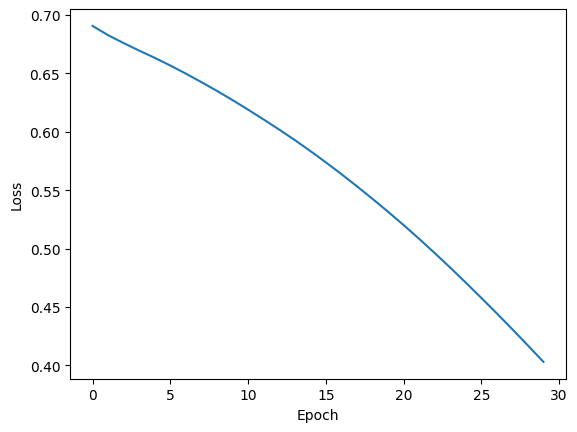

In [8]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

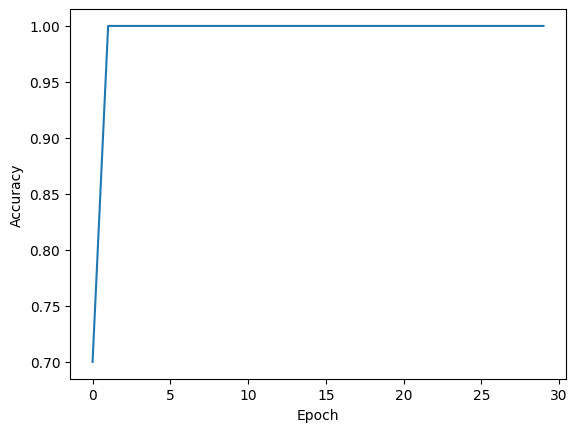

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [10]:
test_doc = ['big income']
encoded_docs = [one_hot(d, vocab_size) for d in test_doc]
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

print(model.predict(padded_docs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
[[0.61348057]]
